# Проект: Анализ поведения пользователей мобильного приложения. #

## Описание проекта. ##

Необходимо провести анализ поведения пользователей мобильного приложения стартапа, который продаёт продукты питания, а так же изучить воронку продаж. 
- Как пользователи доходят до покупки?
- Сколько пользователей доходит до покупки? 
- Сколько пользователей «застревает» на предыдущих шагах?

Исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, можем быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

### Описание данных. ###

Каждая запись в логе — это действие пользователя, или событие.

- <b>EventName</b> — название события;
- <b>DeviceIDHash</b> — уникальный идентификатор пользователя;
- <b>EventTimestamp</b> — время события;
- <b>ExpId</b> — номер эксперимента: *246* и *247* — контрольные группы, а *248* — экспериментальная.

### План выполнения проекта. ###

<b>Шаг 1.</b> Загрузим файл с данными и изучим общую информацию. Путь к файлу: */datasets/logs_exp.csv*.

<b>Шаг 2.</b> Подготовим данные
- Исправим нарушения стиля в наименовании столбцов ;
- Проверим пропуски и типы данных. Откорректируем, если это потребуется;
- Добавим столбец даты и времени, а также отдельный столбец дат;

<b>Шаг 3.</b> Изучим и проверим данные
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?
- Много ли событий и пользователей мы потеряли, отбросив старые данные?
- Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

<b>Шаг 4.</b> Изучим воронку событий
- Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
- Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
- Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряем больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

<b>Шаг 5.</b> Изучим результаты эксперимента
- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками *246* и *247*.
- Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если мы хотите изменить его, проделаем предыдущие пункты и проверим свои выводы.





## Шаг 1. Загрузим файл с данными и изучим общую информацию. ##

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
import plotly.io as pio
pio.renderers.default = 'png'

In [2]:
# загрузка датасета
df = pd.read_csv('logs_exp.csv', sep='\t')

In [3]:
# выведем первые 5 строк 
df.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
# выведем основую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


***Вывод:***<br><br>Выявлено нарушение стиля в наименовании столбцов. Формат данных в столбце *EventTimestamp* не соотвествует формату *datetime*.

## Шаг 2. Подготовим данные. ##

In [5]:
# приведем наименования столбцов датасета к единому стилю
df.columns = ['event_name', 'user_id', 'event_time', 'group']

In [6]:
# проверим датасет на наличие пропусков
df.isna().sum()

event_name    0
user_id       0
event_time    0
group         0
dtype: int64

In [7]:
# проверим датасет на наличие дубликатов
df.duplicated().sum()

413

In [8]:
# удалим дубликаты и сменим индекс
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
# проверим датасет на наличие дубликатов после обработки
df.duplicated().sum()

0

In [10]:
# изменим формат данных стоблца event_time на корректный
df['event_time'] = pd.to_datetime(df['event_time'], unit='s')

In [11]:
# добавим отдельный столбец с датой
df['date'] = df['event_time'].dt.date
df['date'] = df['date'].astype('datetime64') 

In [12]:
# переименуем столбцы групп
df['group'] = df['group'].replace(246, 'A')
df['group'] = df['group'].replace(247, 'A1')
df['group'] = df['group'].replace(248, 'B')

In [13]:
# проверим результат внесенных изменений
df.head(5)

,event_name,user_id,event_time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25


***Вывод:***<br><br>В результате проведенной предобработки, были выполнены следующие действия:
- Наименовая столбцов приведены к единому стилю
- Пропуски не были обнаружены
- Обнаружено и удалено 413 дубликатов
- Изменен формат данных столбца event_time на корректный 
- Добавлен отдельный столбец date с датой

## Шаг 3. Изучим и проверим данные. ##

### Сколько всего событий в логе? ###

In [14]:
# узнаем количество событий в логе
print('Всего событий в логе:',df['event_name'].count())

Всего событий в логе: 243713


### Сколько всего пользователей в логе? ###

In [15]:
# узнаем количество пользователей в логе
print('Всего пользователей в логе:',df['user_id'].nunique())

Всего пользователей в логе: 7551


### Сколько в среднем событий приходится на пользователя? ###

In [16]:
# узнаем количество событий в среднем на одного пользователя
print('Количество событий в среднем на одного пользователя:', (df['event_name'].count() / df['user_id'].nunique()).round())

Количество событий в среднем на одного пользователя: 32.0


### Данными за какой период мы располагаем? ###

In [17]:
# найдем максимальную и минимальную дату
print(' Максимальная дата: ', df['event_time'].max(), '\n', 'Минимальная дата: ', df['event_time'].min())

 Максимальная дата:  2019-08-07 21:15:17 
 Минимальная дата:  2019-07-25 04:43:36


In [18]:
# определим период времени которым мы располагаем
print('Период анализа: ', df['event_time'].max() - df['event_time'].min())

Период анализа:  13 days 16:31:41


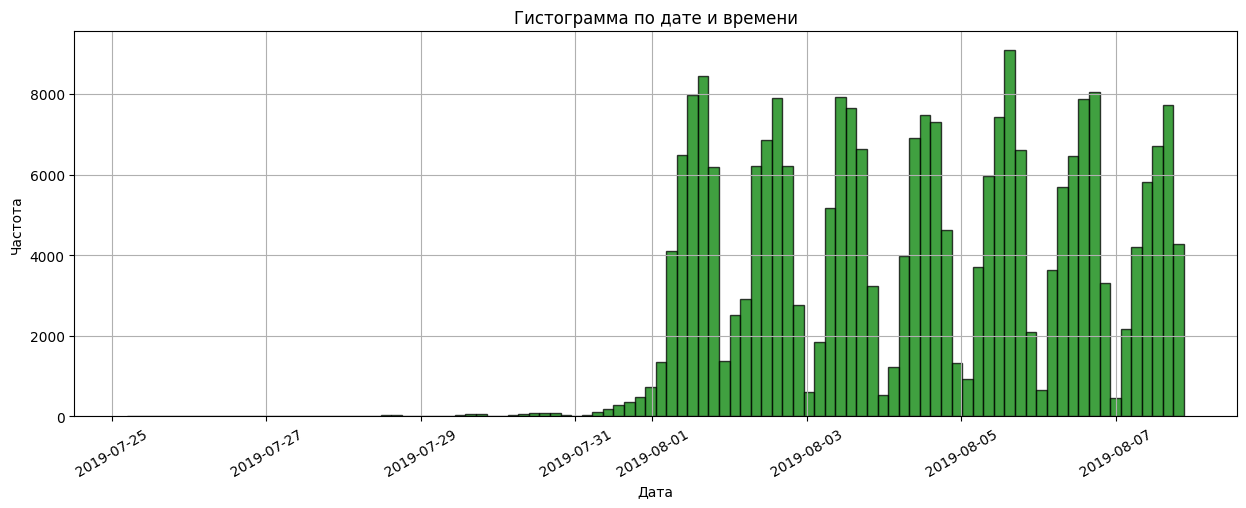

In [19]:
# построим гистограмму по дате и времени.
plt.figure(figsize=(15,5))
plt.hist(df['event_time'],bins=100, facecolor='g', edgecolor='black', alpha=0.75 )
plt.grid(True)
plt.xticks(rotation=30)
plt.xlabel("Дата")
plt.ylabel("Частота")
plt.title('Гистограмма по дате и времени');

In [20]:
# отбрасываем неполные данные
df_new = df.query('date > "2019-07-31"')

### Много ли событий и пользователей мы потеряли, отбросив старые данные? ###

In [21]:
# узнаем сколько потеряно событий при отброске старых данных
print('Потеряно событий: ', df['event_name'].count() - df_new['event_name'].count())
print('Что составляет', ((df['event_name'].count() - df_new['event_name'].count())/df['event_name'].count() * 100).round(), '% от изначальных данных.')

Потеряно событий:  2826
Что составляет 1.0 % от изначальных данных.


In [22]:
# узнаем сколько потеряно пользователей при отброске старых данных
print('Потеряно пользователей: ', df['user_id'].nunique() - df_new['user_id'].nunique())
print('Что составляет', ((df['user_id'].nunique() - df_new['user_id'].nunique())/df['user_id'].nunique() * 100), '% от изначальных данных.')

Потеряно пользователей:  17
Что составляет 0.22513574361011784 % от изначальных данных.


### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп. ###

In [23]:
# проверим наличие пользователей из всех 3-х экспериментальных групп
df_new.groupby('group')['user_id'].nunique()

group
A     2484
A1    2513
B     2537
Name: user_id, dtype: int64

***Вывод:***<br><br>
- Всего событий в логе - *243713*, пользователей - *7551*.
- Количество событий в среднем на одного пользователя - *32*.
- Имеются данные с *2019-07-25* по *2019-08-07*. Общий период составляет *13* дней.
- На гистограмме по дате и времени видно, что данные неполные практически до *2019-07-31*.<br>
  Следовательно берем данные с *2019-08-01* по *2019-08-07*, ибо они наиболее информативные.
- В результате отброски старых данных, мы потеряли *2826* событий и *17* пользователей.
- Данные пользователей из всех трёх экспериментальных групп присутствуют.

## Шаг 4. Изучим воронку событий. ##

### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте. ###

In [24]:
# отсортируем события по частоте
df_new['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие. ###

In [25]:
# сгруппируем и отсортируем события по числу пользователей
funnel = df_new.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
                                                .rename(columns={'user_id':'total_users'})

funnel['percent'] = (funnel['total_users']/ df_new['user_id'].nunique() * 100).round(2)

In [26]:
# отобразим результат
funnel

,event_name,total_users,percent
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки. ###

События происходят в следующем порядке:

- *MainScreenAppear* - Появление главного экрана. Через данное событие прошли 7419 пользователей(98.47% от общего количества)
- *OffersScreenAppear* - Появление экрана с предложением о покупке. 4593 пользователя (60.96% от общего количества)
- *CartScreenApper* - Появление экрана с корзиной. 3734 пользователя (49.96% от общего количества)
- *PaymentScreenSuccessful* - Экран успешного платежа. 3539 пользователей (46.97% от общего количества)

Событие *Tutorial* не встраивается в нашу последовательную цепочку, учитывать данное событие при расчете воронки мы не будем.

### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B. ###

In [27]:
# исключаем событие Tutorial
funnel = funnel.query('event_name != "Tutorial"')

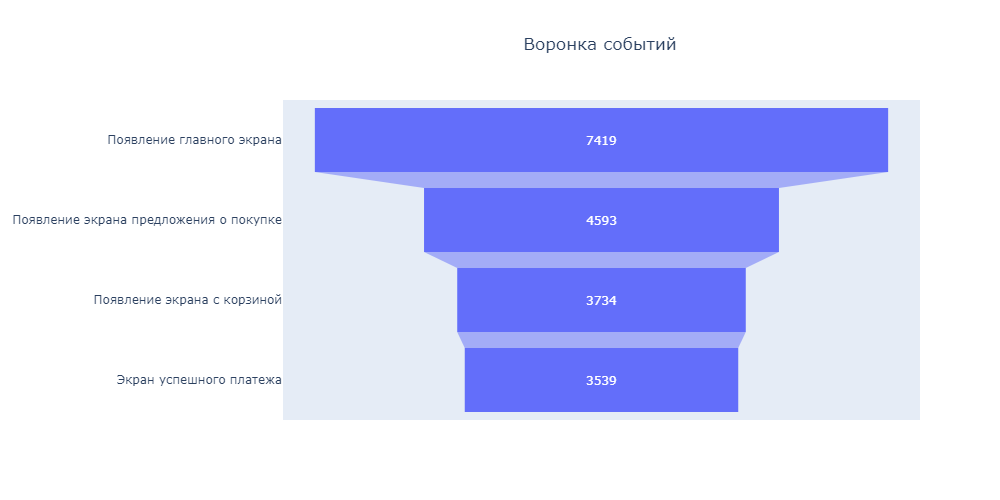

In [50]:
# строим воронку событий
fig = go.Figure(
      go.Funnel(
        y=[ 'Появление главного экрана',
            'Появление экрана предложения о покупке',
            'Появление экрана с корзиной',
            'Экран успешного платежа'],
        x=funnel['total_users']))
fig.update_layout(title='Воронка событий', title_x = 0.6)
fig.show(renderer='png', width=1000, height=500) 

### На каком шаге теряем больше всего пользователей? ###

При переходе с 1 шага(Главный экран) на 2 –ой(Предложение покупки), мы теряем 38 % пользователей, что является самым высоким показателем среди остальных событий. Возможно предложение о покупке слишком навязчивое, стоит внести коррективы в данный раздел.

### Какая доля пользователей доходит от первого события до оплаты? ###

От первого события до оплаты доходит 47.7% пользователей.

***Вывод:***<br><br>
- Самым часто встречающемся событием является «Появление главного экрана» (MainScreenAppear).<br> Данное событие совершали *7419* пользователей (*98.47 %* от общего количества).
- События происходят в следующем порядке:<br>1.MainScreenAppear(*7419 – 98.47 %*) – Появление главного экрана,<br> 2.OffersScreenApper(*4595 – 60.96 %*) – Появление  экрана с предложением о покупке,<br> 3.CartScreenAppear(*3734 – 49.56 %*) – Появление экрана с корзиной, <br>4.PaymentScreenSuccessful(*3539 – 46.97 %*) – Экран успешного платежа.<br> 5.Tutorial(*810 – 11.15 %*) – Руководство пользователя (учитывать данное событие при расчете воронки мы не будем).
- При переходе с главного экрана на экран предложения покупки, мы теряем *38.1 %* пользователей.<br>До появления экрана с корзиной дошли около *50.3 %* пользователей, совершили успешный платеж *47.7 %* от общего количества пользователей.<br>При переходе с главного экрана на экран предложения покупки остается – *61.9 %* пользователей, с экрана предложения покупки на экран корзины – *81.3 %* пользователей, с экрана корзины на экран успешной оплаты – *94.8 %* пользователей. 
- С первого до последнего шага доходит *47.7 %* пользователей.


## Шаг 5. Изучим результаты эксперимента. ##

### Сколько пользователей в каждой экспериментальной группе? ###

In [29]:
# проверим число уникальных пользователей
users = df_new.groupby('group')['user_id'].nunique()

In [30]:
users

group
A     2484
A1    2513
B     2537
Name: user_id, dtype: int64

In [31]:
# проверим не пересекаются ли пользователи в группах
df_new.groupby('user_id')['group'].nunique().reset_index().query('group > 1')

,user_id,group


### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247. ###

<b>Критерии успешного A/A-теста:</b>

- Количество пользователей в различных группах различается не более, чем на 1% или 0.5%
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста.

In [32]:
# получим число пользователей группы А
users_A = (df_new[df_new['group'] == 'A']['user_id']).nunique()
users_A

2484

In [33]:
# получим число пользователей группы А1
users_A1 = (df_new[df_new['group'] == 'A1']['user_id']).nunique()
users_A1

2513

In [34]:
print('Количество пользователей в группах A и A1 различается на', round(100 - users_A / users_A1 * 100, 2), '%')

Количество пользователей в группах A и A1 различается на 1.15 %


### Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно? ###

*Самым популярным событием является - 'MainScreenAppear'*

In [35]:
# создадим таблицу с числом пользователей по каждому событию с разбивкой на группы
all_funnels = df_new.pivot_table(index='event_name', 
                                 columns='group',
                                 values='user_id', 
                                 aggfunc='nunique').sort_values(by='A', ascending=False).reset_index()

In [36]:
# добавим объединенную группа А + А1
all_funnels['A+A1'] = all_funnels['A'] + all_funnels['A1']

In [37]:
# посчитаем долю пользователей группы А
all_funnels['percent_A'] = (all_funnels['A'] / users['A'] * 100).round(1)

In [38]:
# посчитаем долю пользователей группы А1
all_funnels['percent_A1'] = (all_funnels['A1'] / users['A1'] * 100).round(1)

In [39]:
# посчитаем долю пользователей группы B
all_funnels['percent_B'] = (all_funnels['B'] / users['B'] * 100).round(1)

In [40]:
# исключим событие Tutorial
all_funnels = all_funnels.query('event_name != "Tutorial"')

In [41]:
all_funnels

group,event_name,A,A1,B,A+A1,percent_A,percent_A1,percent_B
0,MainScreenAppear,2450,2476,2493,4926,98.6,98.5,98.3
1,OffersScreenAppear,1542,1520,1531,3062,62.1,60.5,60.3
2,CartScreenAppear,1266,1238,1230,2504,51.0,49.3,48.5
3,PaymentScreenSuccessful,1200,1158,1181,2358,48.3,46.1,46.6


In [42]:
# добавим в таблицу число пользователей общей группы А и А1
users['A+A1'] = users['A'] + users['A1']

In [43]:
users

group
A       2484
A1      2513
B       2537
A+A1    4997
Name: user_id, dtype: int64

Для проверки гипотез воспользуемся Z-критерием и применим поправку Бонферрони.

Сформулируем гипотезы:

- <b>H0</b>: Конверсия пользователей в обеих группах равна
- <b>H1</b>: Конверсия в обеих группах не равна

In [44]:
# функция для z-критерия
def z_test(group1, group2, alpha, n): 
    p1_event = all_funnels.loc[event_name, group1]
    p2_event = all_funnels.loc[event_name, group2] 
    p1_users = users.loc[group1] 
    p2_users = users.loc[group2] 
    
    p1 = p1_event / p1_users 
    p2 = p2_event / p2_users 
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    # так как мы проводим множественное сравнение, применим поправку Бонферрони
    bonferroni_alpha = alpha / n
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value}'.format(group1, group2, event_name, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу о равенстве данных в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах")

In [45]:
# сравним группу А с группой А1
for event_name in all_funnels.index:
    z_test('A', 'A1', 0.05, 16)

Проверка для групп A и A1, событие: 0, p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A и A1, событие: 1, p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A и A1, событие: 2, p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A и A1, событие: 3, p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах


Статистически значимая разница между конверсиями пользователей группы А и А1 отсуствует.

### Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать? ###

In [46]:
# сравним группу А с группой B
for event_name in all_funnels.index:
    z_test('A', 'B', 0.05, 16)

Проверка для групп A и B, событие: 0, p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A и B, событие: 1, p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A и B, событие: 2, p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A и B, событие: 3, p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах


In [47]:
# сравним группу А1 с группой B
for event_name in all_funnels.index:
    z_test('A1', 'B', 0.05, 16)

Проверка для групп A1 и B, событие: 0, p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A1 и B, событие: 1, p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A1 и B, событие: 2, p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A1 и B, событие: 3, p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах


In [48]:
# сравним группу А+A1 с группой B
for event_name in all_funnels.index:
    z_test('A+A1', 'B', 0.05, 16)

Проверка для групп A+A1 и B, событие: 0, p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A+A1 и B, событие: 1, p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A+A1 и B, событие: 2, p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах
Проверка для групп A+A1 и B, событие: 3, p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах


Аналогичный результат, статистически значимая разница не наблюдается для всех событий воронки продаж, в том числе и для объединенных групп А + А1. Можно сделать вывод, что изменения шрифта никак не повлияло на пользователей.

***Вывод:***<br><br>
- Получены группы размером А - 2484, А1 - 2513, B - 2537.
- Пересечения пользователей в группах отсутствует.
- Количество пользователей в группах A и A1 различается на 1.15 %.
- Для проверки гипотез был использован Z-критерий и поправка Бонферрони.
- Сформулированы гипотезы:<br><b>H0</b>: Конверсия пользователей в обеих группах равна<br>
    <b>H1</b>: Конверсия в обеих группах не равна
- Проведено 16 проверок А/А/В-эксперимента (внутри контрольных групп,между экспериментальной,двумя контрольными и объединенной контрольной)
- В результате статистически значимая разница между конверсиями пользователей группы А и А1 отсуствует. Аналогичный результат был получен в остальных 12 тестах.


### Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если мы хотите изменить его, проделаем предыдущие пункты и проверим свои выводы. ###

- Был использован коэффициент статистической значимости α, равный 0,05%.
- Проведено 16 проверок А/А/В-эксперимента (4 АА теста и 12 АB тестов).
- Более высокое значение альфа увеличит риск ошибки первого рода, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемый уровень значимости alpha, была применена поправка Бонферрони.

## Общий вывод ##

В результате предобработки данных были внесены следующие изменения:
1. Наименования столбцов были приведены к единому стилю(snake_case),
2. Проведена проверка на наличие пропусков,
3. Пропуски не обнаружены,
4. Обнаружено и удалено <b>413</b> дубликатов,
5. Скорректирован формат данных столбца event_time на корректный,
6. Добавлен отдельный столбец date с датой.

В нашем распоряжении имелись данные с *2019-07-25* по *2019-08-07* (13 дней). Построив гистограмму по дате и времени, мы увидели, что данные неполные и период с *2019-07-25* по *2019-07-31* неинформативен.Для дальнейшего исследования был взят период с *2019-08-01* по *2019-08-07*.

После проведенной обработки и отброски старых данных, мы потеряли <b>286</b> событий и <b>17</b> пользователей (около 1 % от общего количества). Проведена проверка на присутствие данных пользователей всех 3-ех экспериментальных групп.

При выстраивании последовательной цепочки, мы сделали вывод, что события происходят в следующем порядке:
1. MainScreenAppear - Появление главного экрана. Через данное событие прошли <b>7419</b> пользователей (<b>98.47 %</b> от общего количества),
2. OffersScreenAppear - Появление экрана с предложением о покупке. <b>4593</b> пользователя (<b>60.96 %</b> от общего количества), 
3. CartScreenApper - Появление экрана с корзиной. <b>3734</b> пользователя (<b>49.96 %</b> от общего количества), 
4. PaymentScreenSuccessful - Экран успешного платежа. <b>3539</b> пользователей (<b>46.97 %</b> от общего количества),
5. Tutorial - Руководство пользователя. <b>810</b> пользователей (<b>11.15 %</b> от общего количства).

Событие Tutorial малочисленное (возможно по причине игнорирования пользователем) не встраивается в нашу последовательную цепочку, учитывать данное событие при расчете воронки мы стали.

При переходе с этапа главного экрана на этап предложение покупки, мы теряем около <b>38 %</b> пользователей, что является самым высоким показателей, среди остальных шагов в воронке.

До появления экрана с корзиной дошли около <b>50.3 %</b> пользователей, совершили успешный платеж <b>47.7 %</b> от общего количества пользователей.

При переходе с главного экрана на экран предложения покупки остается – <b>61.9 %</b> пользователей, с экрана предложения покупки на экран корзины – <b>81.3 %</b> пользователей, с экрана корзины на экран успешной оплаты – <b>94.8 %</b> пользователей.

От первого события (главный экран) до оплаты доходит <b>47.7 %</b>.

Количество пользователей групп А и А1 отличается на <b>1.15 %</b> (рекомендовано 0.5 – 1%). 

Проведено 16 проверок А/А/В-эксперимента (4 АА теста и 12 АB тестов).
По результатам А/А/B тестов не было обнаружено каких либо различий внутри контрольных групп, между экспериментальной, двумя контрольными и объединенной контрольной.
Следовательно, можно сделать вывод, что замена шрифта не повлияла ни на один шаг воронки продаж.
